<IPython.core.display.Javascript object>


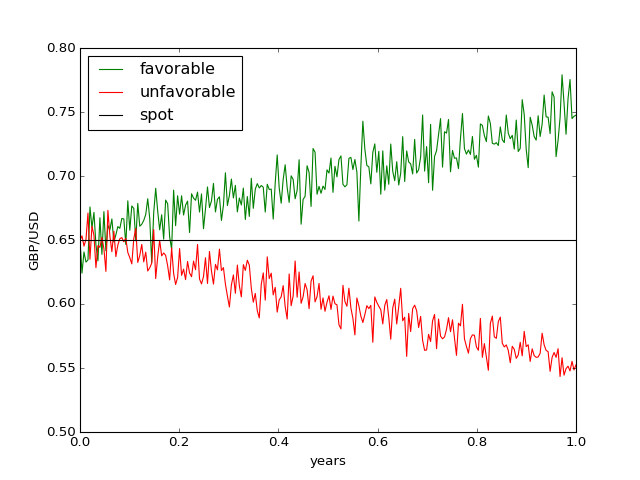

In [3]:
%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.font_manager import FontProperties
import numpy as np

def shocked_values(val, mean=0, sigma=1):
    return np.concatenate(([val[0]], val[1:-1] * np.random.lognormal(mean,sigma,val[1:-1].shape[0]), [val[-1]]))

fig = plt.figure()
ax = fig.add_subplot(111)
grid_size = 250
sigma = 0.15
FX_spot = 0.65
x = np.linspace(0,1,grid_size)
y1 = shocked_values(np.linspace(FX_spot,FX_spot*(1+sigma),grid_size), 0, 0.02)
y2 = shocked_values(np.linspace(FX_spot,FX_spot*(1-sigma),grid_size), 0, 0.02)
ax.plot(x, y1, color='g', label="favorable")
ax.plot(x, y2, color='r', label="unfavorable")
ax.plot(x, np.ones(grid_size)*FX_spot, color='k', label="spot")
ax.set_xlabel("years")
ax.set_ylabel("GBP/USD")
ax.legend(loc="upper left")
plt.show()
output_directory="../pics/"
plt.savefig(output_directory+"fx_scenarios.png")


<IPython.core.display.Javascript object>


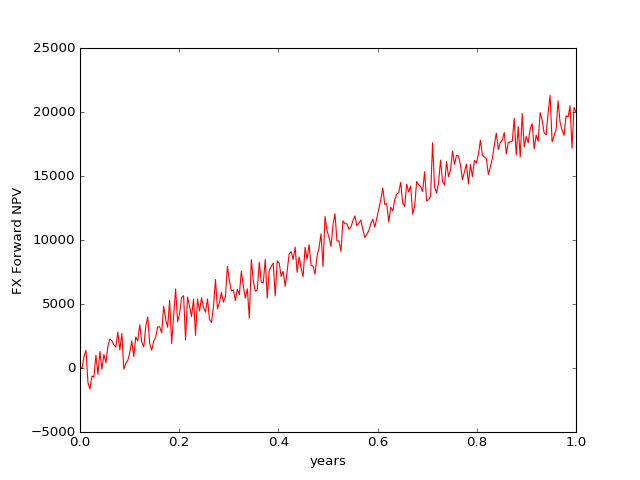

In [4]:
def norm_shocked_values(val, mean=0, sigma=1):
    return np.concatenate(([val[0]], val[1:-1] + np.random.normal(mean,sigma,val[1:-1].shape[0]), [val[-1]]))

fig = plt.figure()
ax = fig.add_subplot(111)
grid_size = 250
sigma = 0.15
FX_spot = 0.65
x = np.linspace(0,1,grid_size)
y1 = norm_shocked_values(np.linspace(0,20000,grid_size), 0, 1000)
ax.plot(x, y1, color='r')
ax.set_xlabel("years")
ax.set_ylabel("FX Forward NPV")
plt.show()
plt.savefig(output_directory+"fx_foward_rising.png")

<IPython.core.display.Javascript object>


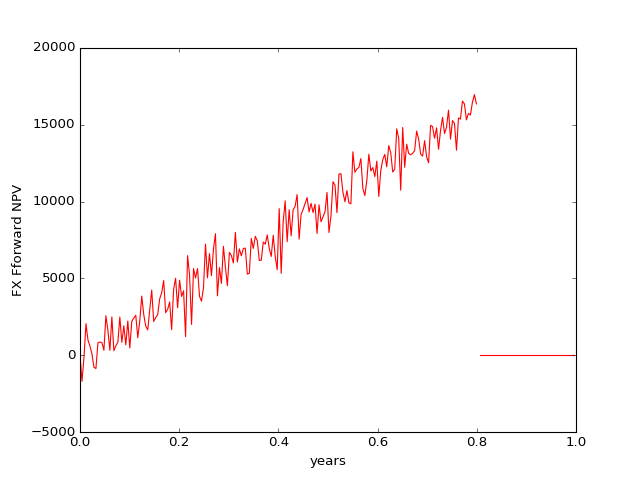

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111)
grid_size = 250
sigma = 0.15
FX_spot = 0.65
x = np.linspace(0,1,grid_size)
y = norm_shocked_values(np.linspace(0,20000,grid_size), 0, 1000)
y[200:grid_size-1] = 0
ax.plot(x[:200], y[:200], color='r')
ax.plot(x[201:-1], y[201:-1], color='r')
ax.set_xlabel("years")
ax.set_ylabel("FX Fforward NPV")
plt.show()
plt.savefig(output_directory+"fx_default.png")

<IPython.core.display.Javascript object>


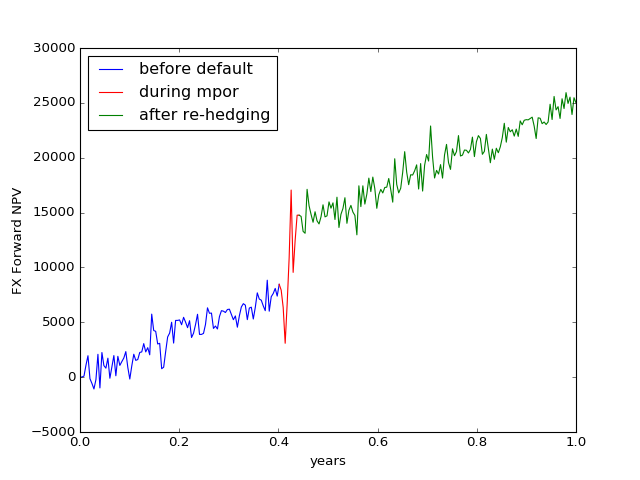

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111)
grid_size = 250
sigma = 0.15
FX_spot = 0.65
x = np.linspace(0,1,grid_size)
y1 = norm_shocked_values(np.linspace(0,20000,grid_size), 0, 1000)
y2 = norm_shocked_values(np.linspace(0,20000,grid_size), 0, 1000) + 5000
y = y1
gap=10
y[100:100+gap] = norm_shocked_values(np.linspace(y1[100],y2[100+gap], gap), 0, 3000)
y[100+gap:] = y2[100+gap:]
ax.plot(x[:101], y[:101], color='b', label="before default")
ax.plot(x[100:100+gap+1], y[100:100+gap+1], color='r', label="during mpor")
ax.plot(x[100+gap:], y[100+gap:], color='g', label="after re-hedging")
ax.set_xlabel("years")
ax.set_ylabel("FX Forward NPV")
ax.legend(loc="upper left")
plt.show()
plt.savefig(output_directory+"mpor_gap.png")

<IPython.core.display.Javascript object>


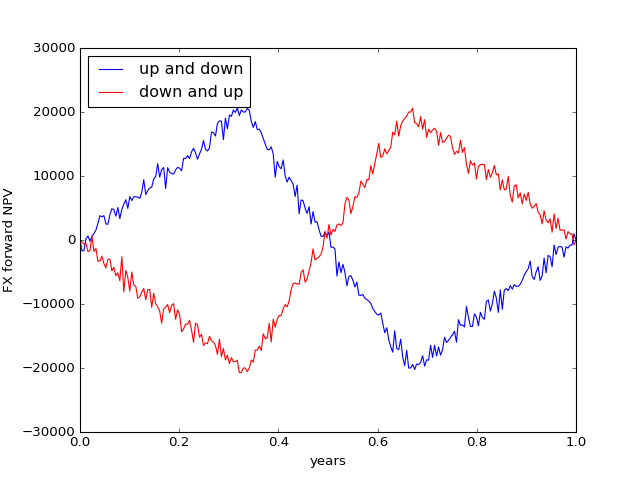

(250,) (250,)


In [7]:
fig = plt.figure()
ax = fig.add_subplot(111)
grid_size = 250
sigma = 0.15
FX_spot = 0.65
x = np.linspace(0,1,grid_size)
y1 = norm_shocked_values(np.linspace(0,20000,grid_size/3), 0, 1000)
y2 = norm_shocked_values(np.linspace(20000,-20000,grid_size/3), 0, 1000)
y3 = norm_shocked_values(np.linspace(-20000,0,grid_size/3+1), 0, 1000)
y = np.concatenate((y1,y2,y3))
z1 = norm_shocked_values(np.linspace(0,-20000,grid_size/3), 0, 1000)
z2 = norm_shocked_values(np.linspace(-20000,20000,grid_size/3), 0, 1000)
z3 = norm_shocked_values(np.linspace(20000,0,grid_size/3+1), 0, 1000)
z = np.concatenate((z1,z2,z3))
print(y.shape, x.shape)
ax.plot(x, y, color='b', label="up and down")
ax.plot(x, z, color='r', label="down and up")
ax.set_xlabel("years")
ax.set_ylabel("FX forward NPV")
ax.legend(loc="upper left")
plt.show()
plt.savefig(output_directory+"path_depedency.png")

<IPython.core.display.Javascript object>


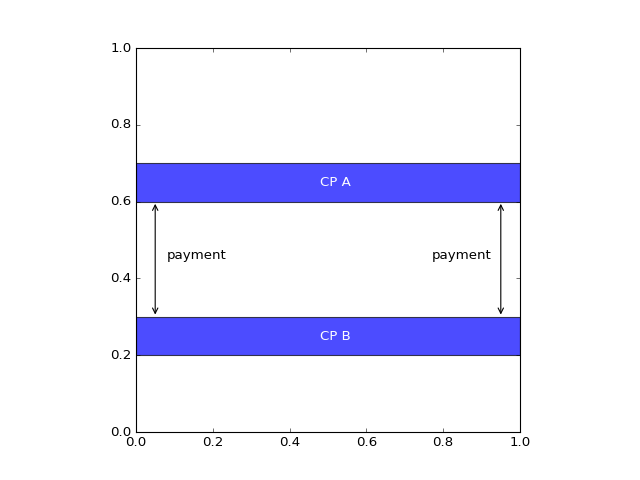

In [8]:
import matplotlib.patches as patches
from matplotlib.lines import Line2D
fig = plt.figure()
ax = fig.add_subplot(111, aspect="equal")
ax.add_patch(patches.Rectangle((0,0.6),1,0.1, facecolor='b', alpha=0.7))
ax.add_patch(patches.Rectangle((0,0.2),1,0.1, facecolor='b', alpha=0.7))
#ax.add_patch(patches.FancyArrowPatch((0.05, 0.2), (0.05, 0.6), arrowstyle='<|-|>',mutation_scale=30, fc='k'))
#ax.annotate('P', xy=(0.05, 0.2), xycoords='data', xytext='data', textcoords=(0.05, 0.4))
ax.annotate('', (0.05, 0.3), (0.05, 0.6), arrowprops={'arrowstyle':'<->'})
ax.annotate('', (0.95, 0.3), (0.95, 0.6), arrowprops=dict(arrowstyle='<->', color='k'))
ax.annotate('CP B', xy=(0.48, 0.24), color='w')
ax.annotate('CP A', xy=(0.48, 0.64), color='w')
ax.annotate('payment', xy=(0.08, 0.45), color='k')
ax.annotate('payment', xy=(0.77, 0.45), color='k')
plt.show()
plt.savefig(output_directory+"cashflows_uncoll.png")

<IPython.core.display.Javascript object>


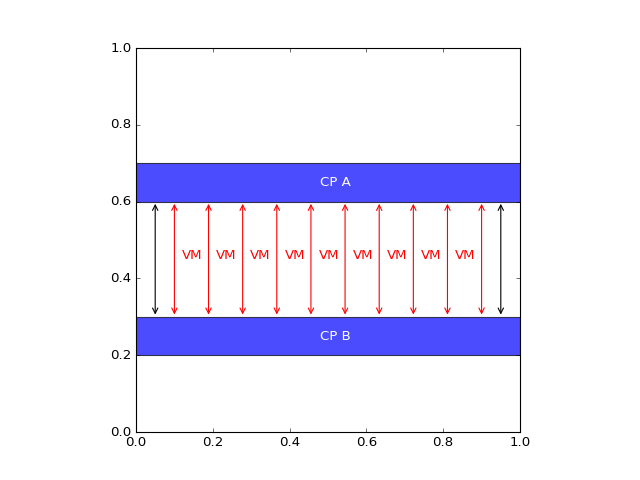

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111, aspect="equal")
ax.add_patch(patches.Rectangle((0,0.6),1,0.1, facecolor='b', alpha=0.7))
ax.add_patch(patches.Rectangle((0,0.2),1,0.1, facecolor='b', alpha=0.7))
#ax.add_patch(patches.FancyArrowPatch((0.05, 0.2), (0.05, 0.6), arrowstyle='<|-|>',mutation_scale=30, fc='k'))
#ax.annotate('P', xy=(0.05, 0.2), xycoords='data', xytext='data', textcoords=(0.05, 0.4))
ax.annotate('', (0.05, 0.3), (0.05, 0.6), arrowprops={'arrowstyle':'<->'})
ax.annotate('', (0.95, 0.3), (0.95, 0.6), arrowprops=dict(arrowstyle='<->', color='k'))
for x in np.linspace(0.1, 0.9, 10):
    ax.annotate('', (x, 0.3), (x, 0.6), arrowprops=dict(arrowstyle='<->', color='r'))
for x in np.linspace(0.1, 0.9, 10)[:-1]:
    ax.annotate('VM', xy=(x+0.02, 0.45), color='r')
ax.annotate('CP B', xy=(0.48, 0.24), color='w')
ax.annotate('CP A', xy=(0.48, 0.64), color='w')
plt.show()
plt.savefig(output_directory+"cashflows_vm_coll.png")

<IPython.core.display.Javascript object>


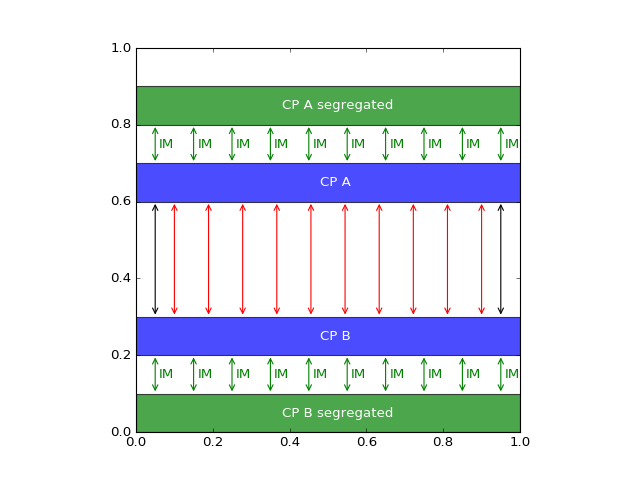

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111, aspect="equal")
ax.add_patch(patches.Rectangle((0,0.6),1,0.1, facecolor='b', alpha=0.7))
ax.add_patch(patches.Rectangle((0,0.2),1,0.1, facecolor='b', alpha=0.7))
#ax.add_patch(patches.FancyArrowPatch((0.05, 0.2), (0.05, 0.6), arrowstyle='<|-|>',mutation_scale=30, fc='k'))
#ax.annotate('P', xy=(0.05, 0.2), xycoords='data', xytext='data', textcoords=(0.05, 0.4))
ax.annotate('', (0.05, 0.3), (0.05, 0.6), arrowprops={'arrowstyle':'<->'})
ax.annotate('', (0.95, 0.3), (0.95, 0.6), arrowprops=dict(arrowstyle='<->', color='k'))
for x in np.linspace(0.1, 0.9, 10):
    ax.annotate('', (x, 0.3), (x, 0.6), arrowprops=dict(arrowstyle='<->', color='r'))
ax.annotate('CP B', xy=(0.48, 0.24), color='w')
ax.annotate('CP A', xy=(0.48, 0.64), color='w')
for x in np.linspace(0.05, 0.95, 10):
    ax.annotate('', (x, 0.1), (x, 0.2), arrowprops=dict(arrowstyle='<->', color='g'))
    ax.annotate('IM', xy=(x+0.01, 0.74), color='g')
    ax.annotate('', (x, 0.7), (x, 0.8), arrowprops=dict(arrowstyle='<->', color='g'))
    ax.annotate('IM', xy=(x+0.01, 0.14), color='g')
    
ax.add_patch(patches.Rectangle((0,0.8),1,0.1, facecolor='g', alpha=0.7))
ax.add_patch(patches.Rectangle((0,0),1,0.1, facecolor='g', alpha=0.7))
ax.annotate('CP B segregated', xy=(0.38, 0.04), color='w')
ax.annotate('CP A segregated', xy=(0.38, 0.84), color='w')

plt.show()
plt.savefig(output_directory+"cashflows_im_vm_coll.png")